<a href="https://colab.research.google.com/github/lizardnote/ML_practice/blob/main/hands_on_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#hands on 머신러닝 _ Part2 _ #10.인공신경망 소개
- 퍼셉트론
  - sklearn은 하나의 TLU 네트워크를 구현한 퍼셉트론 클래스를 제공함
  - SGDClassifier 과 매개변수가 동일함
  - 로지스틱 회귀분류기와 달리 퍼셉트론은 클래스 확률을 제공하지 않아 고정된 임계값 기준으로 예측

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [20]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

### 다층 퍼셉트론
- 퍼셉트론이 해결하지 모하는 XOR 논리합 문제를 해결
- 입력층, 은닉층(1개 이상의 TLU 층), 출력층 (은닉층을 여러개 쌓아 올리면 심층 신경망)
- 신호는 입력 -> 출력으로만 흐르므로 피드포워드 신경망이라고 부른다.


### tesorflow - keras 실습

In [21]:
!pip install tensorflow

In [23]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.18.0'

In [25]:
keras.__version__

'3.8.0'

데이터 셋 적재

In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_train_full.dtype

dtype('uint8')

이 데이터셋은 이미 훈련/테스트 셋으로 나뉘어 있음
- 검증 세트가 없으므로 생성
- 경사하강법으로 신경망을 훈련하기 떄문에 입력 특성의 스케일 조정이 필요함
- 픽셀 강도를 255.0으로 나누어서 0-1 사이 범위로 조정

In [29]:
X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [32]:
class_names[y_train[0]]

'Coat'

In [33]:
# Sequential 모델을 만든다. 가장 간단한 케라스의 신경망 모델로 순서대로 연결된 층을 일렬로 쌓는 구조이며 시퀀셜 API라고 부른다.
model = keras.models.Sequential()

#Flatten층은 입력이미지를 1D 배열로 변환한다. 간단한 전처리 수행 / 첫번째 층은 input_shape을 지정해야 한다.
model.add(keras.layers.Flatten(input_shape=[28,28]))
#뉴런 300개 가진 Dense층 추가, 활성화 함수는 relu 사용 / 이 층은 각자 가중치 행렬를 관리한다(층의 뉴런과 입력 사이의 모든 연결 가중치 포함)
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


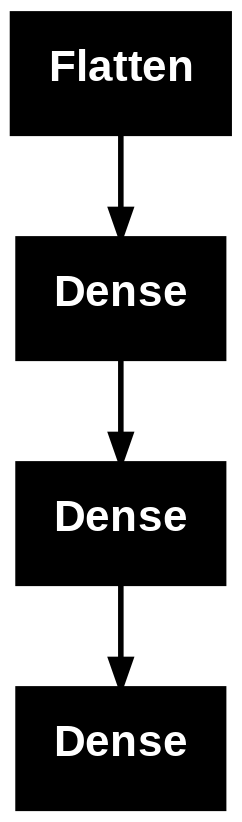

In [35]:
keras.utils.plot_model(model)

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [39]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
model.get_layer('dense') is hidden1

True

In [41]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.07107589, -0.00404938,  0.07351926, ...,  0.01577601,
         0.06713362, -0.06546021],
       [ 0.01923291,  0.03979975,  0.01338926, ...,  0.01888326,
        -0.00811982,  0.07301402],
       [ 0.02177299, -0.04928156,  0.02384399, ...,  0.05077106,
         0.00505147, -0.06125252],
       ...,
       [-0.03507753,  0.00736007, -0.03002384, ...,  0.01224948,
         0.07028073, -0.00360254],
       [ 0.00170641,  0.01670113, -0.03893748, ...,  0.07289225,
        -0.04188434,  0.07215041],
       [-0.00283538, -0.00276093, -0.06202551, ...,  0.04480696,
         0.02331735,  0.00011627]], dtype=float32)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
weights.shape

(784, 300)

In [44]:
biases.shape

(300,)

In [47]:
model.compile(loss = "sparse_categorical_crossentropy", #클래스가 배타적이므로 이 손실을 사용 /
                                                        #만약 샘플마다 클래스별 타깃 확률을 가진다면 categorical_crossentropy 손실 사용
                                                        #이진분류나 다중 레이블 이진분류를 해야한다면 softmax 대신 sigmoid 사용, binary_crossentropy 손실 사용
              optimizer ="sgd", #sgd를 지정하면 기본 확률적 경사 하강법을 사용해 모델 훈련
              metrics = ["accuracy"])

모델 훈련 및 평가

In [48]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6824 - loss: 0.9977 - val_accuracy: 0.8182 - val_loss: 0.5256
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8268 - loss: 0.5028 - val_accuracy: 0.8450 - val_loss: 0.4507
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8434 - loss: 0.4513 - val_accuracy: 0.8532 - val_loss: 0.4289
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8518 - loss: 0.4268 - val_accuracy: 0.8628 - val_loss: 0.3959
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8587 - loss: 0.4036 - val_accuracy: 0.8652 - val_loss: 0.3971
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8668 - loss: 0.3831 - val_accuracy: 0.8690 - val_loss: 0.3708
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8705 - loss: 0.3705 - val_accuracy: 0.8738 - val_loss: 0.3660
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8747 - loss: 0.3559

샘플개수, 갬플마다 걸린 평균 훈련 시간, 훈련세트와 검증세트에 대한 손실과 정확도(+추가지표) 출력

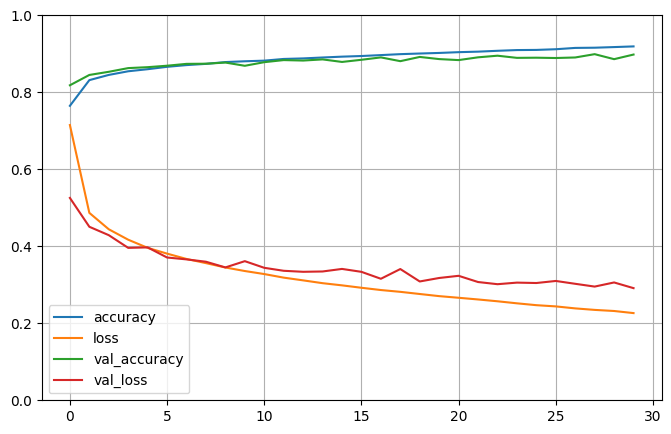

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8877 - loss: 0.3292


[0.3224180042743683, 0.8883000016212463]

### 모델을 사용해 예측 만들기 - 381page

In [51]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
# y_pred = model.predict_classes(X_new)
# y_pred

y_pred = model.predict(X_new)
# predicted = y_pred.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [61]:
y_pred

array([[6.1143703e-07, 3.5068373e-07, 1.3452341e-06, 2.9862260e-06,
        2.4651301e-06, 1.5683352e-03, 6.9871072e-07, 6.7164083e-03,
        1.2906270e-04, 9.9157774e-01],
       [4.6388482e-06, 4.9383737e-09, 9.9837291e-01, 1.5538957e-09,
        1.4165733e-03, 1.2672841e-11, 2.0592619e-04, 3.0174043e-12,
        6.7228587e-09, 1.4123507e-11],
       [9.0863296e-06, 9.9998701e-01, 2.7873807e-07, 3.4973039e-06,
        1.4719804e-07, 1.9599459e-11, 3.1492895e-08, 6.2621713e-10,
        1.7248479e-09, 7.7138317e-11]], dtype=float32)

In [62]:
(model.predict(X_test) > 0.5).astype("int32")
# 'np.array(class_names)[y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)